------------------------------------------------------------------------------------------------------------------------------------------------------

##### **AUTOR**: Sergio Chueco Medina
##### **LINKEDIN**: https://www.linkedin.com/in/sergio-chueco-medina/
##### **GITHUB**: https://github.com/Sergiochueco-94

------------------------------------------------------------------------------------------------------------------------------------------------------

# **Importación de librerias**

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


import sklearn
from sklearn import set_config
set_config(transform_output = "pandas")
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer


In [2]:
print("Trabajaremos con las siguientes versiones\n")
print("Pandas",pd.__version__)
print("Numpy",np.__version__)
print("Seaborn", sns.__version__)
print("Sklearn", sklearn.__version__)
!python --version


Trabajaremos con las siguientes versiones

Pandas 2.0.2
Numpy 1.25.0
Seaborn 0.12.2
Sklearn 1.3.1
Python 3.11.3


# **Cargar datos**

In [3]:
CWD_1 = os.getcwd()
DATA_PATH_1 = os.path.join(CWD_1,"data")
FILE_NAME_1 = "2017_lloguer_preu_trim.csv"
lloguer = os.path.join(DATA_PATH_1,FILE_NAME_1)

In [4]:
CWD_2 = os.getcwd()
DATA_PATH_2 = os.path.join(CWD_2,"data")
FILE_NAME_2 = "2017_poblacio_exposada_barris_mapa_estrategic_soroll_bcn_long.csv"
poblacio_soroll = os.path.join(DATA_PATH_2,FILE_NAME_2)

In [5]:
df_lloguer = pd.read_csv(lloguer)
df_poblacio = pd.read_csv(poblacio_soroll)

# **Funciones**

In [6]:
# Creamos una función simple para hacer un report simple sobre los DataFrame suministrados
def report_df(dataframe, verbose = True):
    print("El tamaño del dataset es", dataframe.shape[0], "filas y", dataframe.shape[1], "columnas")
    print()
    print(dataframe.info(verbose = verbose))
    total_nulos = dataframe.isnull().sum().sum()
    print()
    print(f"Tenemos un total de {total_nulos} nulos")
    print()
    print("Hay", dataframe.duplicated().sum(), "duplicados")


In [7]:
# Función para convertir columnas categóricas a numéricas de cara a preprocesar los datos y preparlos para un modelo
def OHE (dataframe, column_name):
    _dummy_dataset = pd.get_dummies(dataframe[column_name],prefix=column_name)
    dataframe = pd.concat([dataframe,_dummy_dataset],axis=1)
    return dataframe.drop(column_name,axis=1)

In [8]:
# Función para reducir la dimensionalidad de variables que contengan etiquetas similares
def juntar_etiquetas(dataframe,column,value_contain,new_value):
    dataframe.loc[dataframe[column].str.contains(value_contain), column] = new_value

# **df_lloguer** -- análisis y limpieza

In [9]:
report_df(df_lloguer)

df_lloguer.head(2)

El tamaño del dataset es 584 filas y 8 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584 entries, 0 to 583
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Any             584 non-null    int64  
 1   Trimestre       584 non-null    int64  
 2   Codi_Districte  584 non-null    int64  
 3   Nom_Districte   584 non-null    object 
 4   Codi_Barri      584 non-null    int64  
 5   Nom_Barri       584 non-null    object 
 6   Lloguer_mitja   584 non-null    object 
 7   Preu            546 non-null    float64
dtypes: float64(1), int64(4), object(3)
memory usage: 36.6+ KB
None

Tenemos un total de 38 nulos

Hay 0 duplicados


,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,2017,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,2017,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26


In [10]:
df_lloguer.isnull().sum()

Any                0
Trimestre          0
Codi_Districte     0
Nom_Districte      0
Codi_Barri         0
Nom_Barri          0
Lloguer_mitja      0
Preu              38
dtype: int64

In [11]:
df_lloguer[df_lloguer['Preu'].isnull()]

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
11,2017,1,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
41,2017,1,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
46,2017,1,8,Nou Barris,47,Can Peguera,Lloguer mitjà mensual (Euros/mes),NaN
55,2017,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
57,2017,1,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),NaN
84,2017,2,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN
114,2017,2,7,Horta-Guinardó,42,la Clota,Lloguer mitjà mensual (Euros/mes),NaN
126,2017,2,8,Nou Barris,54,Torre Baró,Lloguer mitjà mensual (Euros/mes),NaN
130,2017,2,9,Sant Andreu,58,Baró de Viver,Lloguer mitjà mensual (Euros/mes),NaN
157,2017,3,3,Sants-Montjuïc,12,la Marina del Prat Vermell,Lloguer mitjà mensual (Euros/mes),NaN


In [12]:
df_lloguer[df_lloguer['Preu'].isnull()]['Nom_Barri'].unique()   
#Vemos en que barrios tenemos los nulos para buscar algún patron y decidir como imputarlos mejor

array(['la Marina del Prat Vermell', 'la Clota', 'Can Peguera',
       'Vallbona', 'Baró de Viver', 'Torre Baró'], dtype=object)

In [13]:
df_lloguer[df_lloguer['Nom_Barri']=='Vallbona']
#Análizamos un barrio con valores nulos al azar

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
55,2017,1,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
128,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),302.52
201,2017,3,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
274,2017,4,8,Nou Barris,56,Vallbona,Lloguer mitjà mensual (Euros/mes),NaN
347,2017,1,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN
420,2017,2,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),4.45
493,2017,3,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN
566,2017,4,8,Nou Barris,56,Vallbona,Lloguer mitjà per superfície (Euros/m2 mes),NaN


In [14]:
# Observamos como se compone cada distrito, no depende de un único barrio, sino que puede contener varios
df_lloguer[df_lloguer['Nom_Districte']=='Sants-Montjuïc']['Codi_Barri'].unique()

array([11, 12, 13, 14, 15, 16, 17, 18], dtype=int64)

In [15]:
#Realizamos un describe de variables numéricas para ver su distribución
df_lloguer.describe(include=np.number).T   

,count,mean,std,min,25%,50%,75%,max
Any,584.0,2017.000000,0.000000,2017.00,2017.000,2017.000,2017.0000,2017.00
Trimestre,584.0,2.500000,1.118992,1.00,1.750,2.500,3.2500,4.00
Codi_Districte,584.0,6.246575,2.790726,1.00,4.000,7.000,8.0000,10.00
Codi_Barri,584.0,37.000000,21.089371,1.00,19.000,37.000,55.0000,73.00
Preu,546.0,421.009231,446.178147,4.45,12.645,161.565,770.3475,1882.42


In [16]:
#Realizamos un describe de variables categóricas para ver su distribución
df_lloguer.describe(exclude=np.number).T   

,count,unique,top,freq
Nom_Districte,584,10,Nou Barris,104
Nom_Barri,584,73,el Raval,8
Lloguer_mitja,584,2,Lloguer mitjà mensual (Euros/mes),292


In [17]:
df_lloguer['Lloguer_mitja'].value_counts()

Lloguer_mitja
Lloguer mitjà mensual (Euros/mes)              292
Lloguer mitjà per superfície (Euros/m2 mes)    292
Name: count, dtype: int64

#### Observamos que tenemos un Dataset de 10 Distritos distintos y con 73 Barrios, como hemos comprobado antes, cada Distrito esta compuesto de varios Barrios. De ahí que obtengamos un Dataset de 292 filas. Si comprobamos además el patrón de Lloguer_mitja podemos intuir que puede dividirse en 2. Por un lado Precio medio mensual para cada barrio y distrito, de ahí las 292 filas y por otro lado el precio medio por m2 por barrio y distrito de ahí las otras 292 filas. En total conforman nuestro dataset de 584 filas. Veremos más adelante como tratamos esto.

#### También vemos que hay columnas sin varianza como el caso del año,siempre es 2017, por lo tanto no nos aporta información útil de cara a hacer un futuro modelo y por eso lo eliminamos utilizando esta función lambda.

In [18]:
list_vars_non_variance = [column for column in df_lloguer.columns if df_lloguer[column].nunique(dropna = False) == 1]
df_lloguer.drop(list_vars_non_variance, axis = 1, inplace = True)

In [19]:
df_lloguer.head(1)

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99


In [20]:
df_lloguer[df_lloguer['Lloguer_mitja']=="Lloguer mitjà mensual (Euros/mes)"]

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
1,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),905.26
2,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),722.78
3,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),895.28
4,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),871.08
...,...,...,...,...,...,...,...
287,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1233.01
288,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),621.32
289,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),864.09
290,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),790.58


In [21]:
df_lloguer[df_lloguer['Lloguer_mitja']!="Lloguer mitjà mensual (Euros/mes)"]

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
292,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),13.50
293,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),14.14
294,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),19.46
295,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),15.01
296,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.77
...,...,...,...,...,...,...,...
579,4,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.51
580,4,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),10.40
581,4,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),12.66
582,4,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),10.83


In [22]:
df_lloguer[(df_lloguer['Codi_Barri']==1)&(df_lloguer['Codi_Districte']==1)]

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu
0,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),734.99
73,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),714.29
146,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),764.85
219,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),776.73
292,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),13.50
365,2,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),13.69
438,3,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),13.97
511,4,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),14.42


#### Hemos visto que el DataFrame de lloguer esta compuesto por 584 filas, 292 con precio medio mensual del alquiler y los otros 292 son exactamente las mismas filas varian que el precio esta puesto por m2. Así que vamos a generar un "id" único para cada fila, ya que cada fila corresponde a un trimestre, distrito y barrio distintos. 

#### Después colocaremos esas 292 filas con precio por m2 y lo convertiremos en una columna, de tal manera que nos quedaremos con un Dataframe de lloguer de 292 filas y con valores de precio medio mensual y precio por m2 en columnas diferenciadas

In [23]:
# Creación de id único con Trimestre, Distrito y Barrio
df_lloguer['id'] = df_lloguer['Trimestre'].apply(str) + "_" + df_lloguer['Codi_Districte'].apply(str)  + "_" + df_lloguer['Codi_Barri'].apply(str) 

In [24]:
df_lloguer.set_index('id',inplace=True)

In [25]:
# Filtramos por los valores de precio medio por superficie y nos quedamos con el precio, 
# le cambiamos el nombre a la columna para después poder hacer merge con la otra parte del df 
# y tenerlo bien identificado.
preu_superficie = df_lloguer[df_lloguer['Lloguer_mitja']=="Lloguer mitjà per superfície (Euros/m2 mes)"][['Preu']]
preu_superficie.rename(columns = {"Preu":"Preu_lloguer_mitja_superficie_m2"},inplace=True)

In [26]:
preu_superficie #imprimimos para ver cómo queda

,Preu_lloguer_mitja_superficie_m2
id,
1_1_1,13.50
1_1_2,14.14
1_1_3,19.46
1_1_4,15.01
1_2_5,12.77
...,...
4_10_69,16.51
4_10_70,10.40
4_10_71,12.66


In [27]:
# Filtramos por la otra mitad del dataset y cambiamos también el nombre de la columna 
# para tenerlo bien identificado
df_lloguer_unique = df_lloguer[df_lloguer['Lloguer_mitja']=="Lloguer mitjà mensual (Euros/mes)"]
df_lloguer_unique.rename(columns = {"Preu":"Preu_lloguer_mitja_mensual"},inplace=True)

In [28]:
# Hacemos merge a través del 'id' que hemos creado antes e imprimimos el shape antes y después 
# para asegurar de no hacer un cartesiano
print(df_lloguer_unique.shape)

df_lloguer_unique = pd.merge(df_lloguer_unique,preu_superficie, on = 'id', how='left')

print(df_lloguer_unique.shape)

(292, 7)
(292, 8)


In [29]:
df_lloguer_unique.drop('Lloguer_mitja',axis=1,inplace=True)

In [30]:
#comprobamos los nulos y vemos que coinciden con los que teniamos desde un inicio
df_lloguer_unique.isnull().sum() 

Trimestre                            0
Codi_Districte                       0
Nom_Districte                        0
Codi_Barri                           0
Nom_Barri                            0
Preu_lloguer_mitja_mensual          19
Preu_lloguer_mitja_superficie_m2    19
dtype: int64

#### Realizamos una comprobación visual para ver que coincide el cambio realizado

In [31]:
df_lloguer_unique[(df_lloguer_unique['Codi_Barri']==1)&(df_lloguer_unique['Codi_Districte']==1)]

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2
id,,,,,,,
1_1_1,1,1,Ciutat Vella,1,el Raval,734.99,13.50
2_1_1,2,1,Ciutat Vella,1,el Raval,714.29,13.69
3_1_1,3,1,Ciutat Vella,1,el Raval,764.85,13.97
4_1_1,4,1,Ciutat Vella,1,el Raval,776.73,14.42


# **Análisis visual de variables**

#### Ahora que ya tenemos el Dataset "mejor ordenado", vamos a realizar comprobaciones visuales para ver como se distribuyen, poder capturar la existencia de outliers, entender mejor nuestro Target,etc

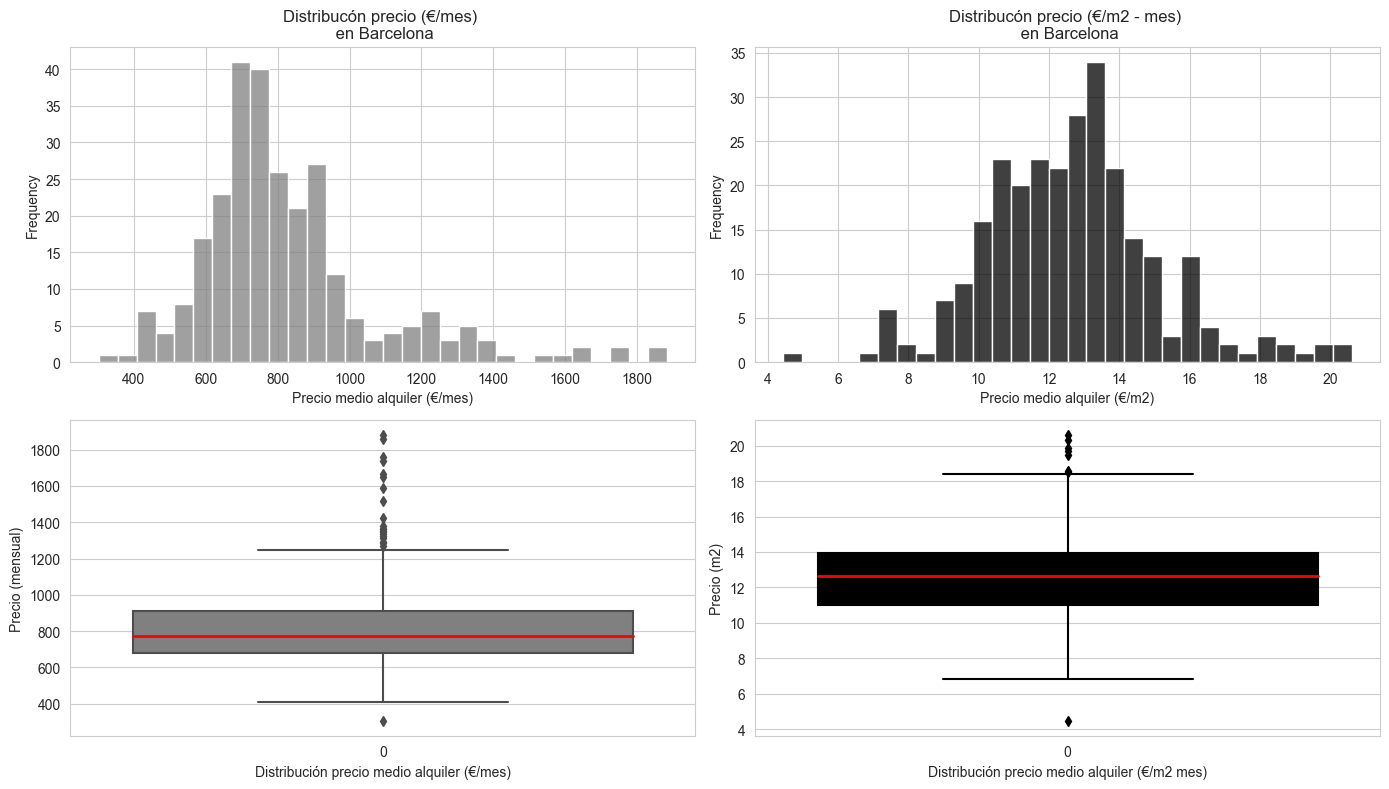

In [32]:
# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Create distribution plots for each category
plt.figure(figsize=(14, 8))

# Plot for 'Lloguer mitjà mensual (Euros/mes)'
plt.subplot(2, 2, 1)
sns.histplot(df_lloguer_unique['Preu_lloguer_mitja_mensual'], color='grey',bins=30)
plt.title('Distribucón precio (€/mes) \n en Barcelona')
plt.xlabel('Precio medio alquiler (€/mes)')
plt.ylabel('Frequency')

# Plot for 'Lloguer mitjà per superfície (Euros/m2 mes)'
plt.subplot(2, 2, 2)
sns.histplot(df_lloguer_unique['Preu_lloguer_mitja_superficie_m2'], color='black', bins=30)
plt.title('Distribucón precio (€/m2 - mes) \n en Barcelona')
plt.xlabel('Precio medio alquiler (€/m2)')
plt.ylabel('Frequency')

# Plot for 'Lloguer mitjà mensual (Euros/mes) boxplot'
plt.subplot(2, 2, 3)
sns.boxplot(df_lloguer_unique['Preu_lloguer_mitja_mensual'], color='grey',medianprops={"color": "r", "linewidth": 2})
plt.xlabel('Distribución precio medio alquiler (€/mes)')
plt.ylabel('Precio (mensual)')

# Plot for 'Lloguer mitjà per superfície (Euros/m2 mes) boxplot'
plt.subplot(2, 2, 4)
sns.boxplot(df_lloguer_unique['Preu_lloguer_mitja_superficie_m2'],color = "black", medianprops={"color": "r", "linewidth": 2})
plt.xlabel('Distribución precio medio alquiler (€/m2 mes)')
plt.ylabel('Precio (m2)')

# Display the plots
plt.tight_layout()
plt.show()


##### Podemos observar como la mayoría de precio oscila entre 600€ y 1000€ aprox (€/mes).También podemos ver que la distribución es parecida a una distribución normal,lo que ayudará a nuestro futuro modelo,aunque un poco a la izquierda, pero tiene sentido que haya alquileres a precios más cercanos a la media que a precios más altos

##### Podemos observar como la mayoría de precio oscila entre 10€ y 15€ aprox ( €/m2).También podemos ver que la distribución es parecida a una distribución normal, lo que ayudará a nuestro futuro modelo

In [33]:
df_lloguer_unique[df_lloguer_unique['Preu_lloguer_mitja_mensual']<=400]

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2
id,,,,,,,
2_8_56,2,8,Nou Barris,56,Vallbona,302.52,4.45


In [34]:
df_lloguer_unique[df_lloguer_unique['Nom_Barri']=="Vallbona"]

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2
id,,,,,,,
1_8_56,1,8,Nou Barris,56,Vallbona,NaN,NaN
2_8_56,2,8,Nou Barris,56,Vallbona,302.52,4.45
3_8_56,3,8,Nou Barris,56,Vallbona,NaN,NaN
4_8_56,4,8,Nou Barris,56,Vallbona,NaN,NaN


In [35]:
df_lloguer_unique[df_lloguer_unique['Preu_lloguer_mitja_mensual']>=1400]

,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2
id,,,,,,,
1_4_21,1,4,Les Corts,21,Pedralbes,1856.57,16.05
1_5_24,1,5,Sarrià-Sant Gervasi,24,les Tres Torres,1516.52,16.12
2_4_21,2,4,Les Corts,21,Pedralbes,1666.63,16.76
2_5_23,2,5,Sarrià-Sant Gervasi,23,Sarrià,1423.86,17.93
2_5_24,2,5,Sarrià-Sant Gervasi,24,les Tres Torres,1646.76,16.76
3_4_21,3,4,Les Corts,21,Pedralbes,1882.42,16.54
3_5_24,3,5,Sarrià-Sant Gervasi,24,les Tres Torres,1757.00,16.07
4_4_21,4,4,Les Corts,21,Pedralbes,1737.92,15.22
4_5_24,4,5,Sarrià-Sant Gervasi,24,les Tres Torres,1588.53,18.38


#### Comprobamos que tanto los valores por encima y por debajo que están fuera de rango intercuartiles, no los consideraremos outliers, ya que tiene sentido que el barrio de Sarria , Pedralbes y les Tres Torres , son considerados de las rentas per cápita más elevadas de Cataluña. Y por otro lado, Vallbona, es uno de los barrios más baratos.

#### En el ranking del Precio Medio del Alquiler en Barcelona, el barrio Vallbona ocupa el puesto 0 de los 75 barrios de toda la ciudad. Titular sacado de: https://www.enalquiler.com/barrios/barcelona/vallbona_50.html

In [36]:
df_lloguer_unique.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Trimestre,292.0,2.500000,1.119953,1.00,1.75,2.50,3.25,4.00
Codi_Districte,292.0,6.246575,2.793123,1.00,4.00,7.00,8.00,10.00
Codi_Barri,292.0,37.000000,21.107481,1.00,19.00,37.00,55.00,73.00
Preu_lloguer_mitja_mensual,273.0,829.380403,253.210128,302.52,680.80,771.78,912.51,1882.42
Preu_lloguer_mitja_superficie_m2,273.0,12.638059,2.479090,4.45,11.00,12.64,13.97,20.61


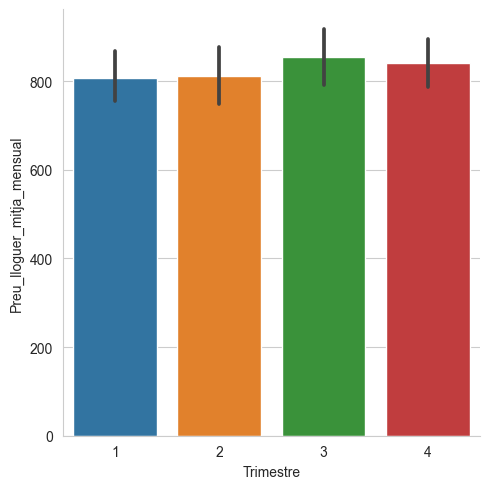

In [37]:
sns.catplot(df_lloguer_unique,x = 'Trimestre',y = 'Preu_lloguer_mitja_mensual',kind = 'bar'); 
#Observamos que el 3 trimestre es donde se registran la media de precios más elevada

In [38]:
df_ascending_preu = df_lloguer_unique.sort_values(by = "Preu_lloguer_mitja_mensual",ascending = False)
# Ordenamos por precio más alto para ploter los distritos
# y ver más rápidamente la información

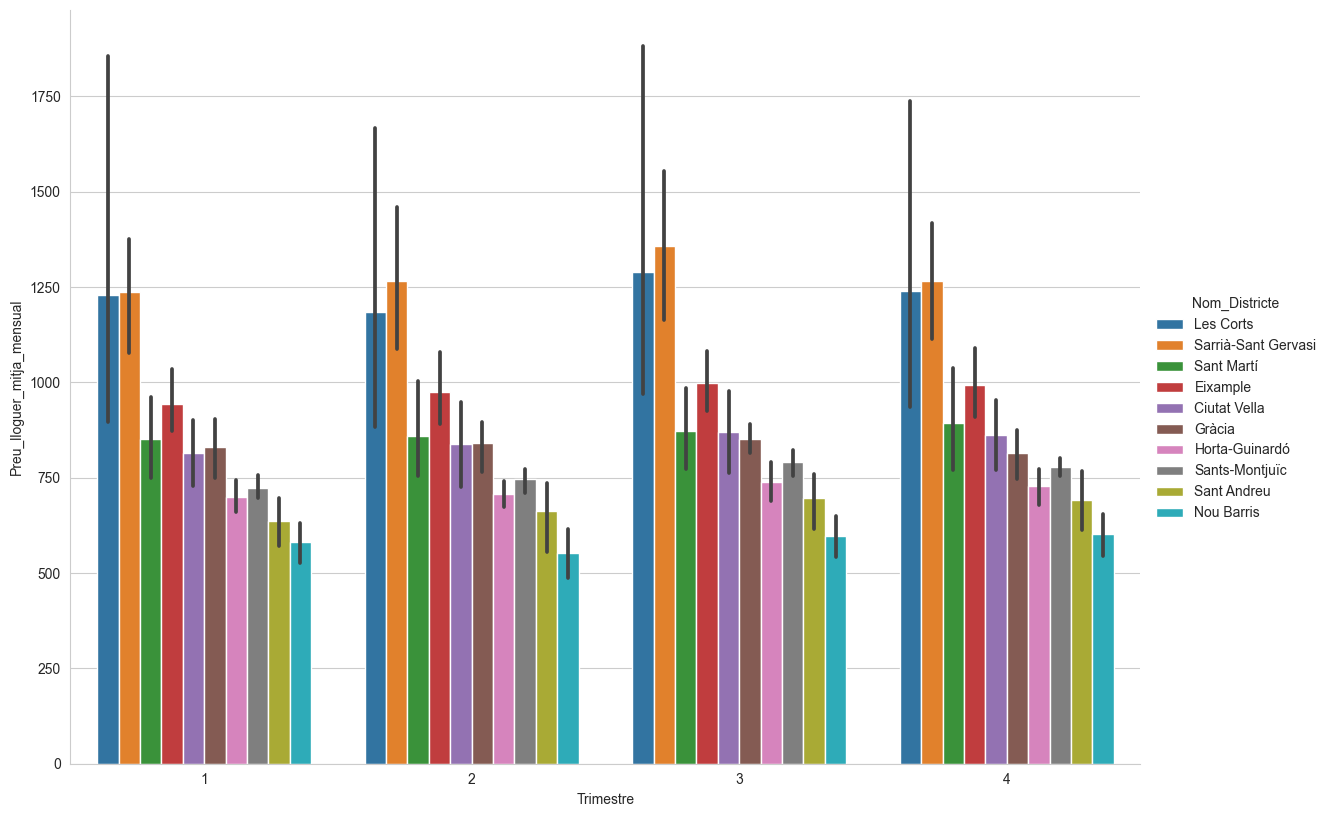

In [39]:
sns.catplot(
    df_ascending_preu,
    x = 'Trimestre',
    y = 'Preu_lloguer_mitja_mensual',
    hue = "Nom_Districte",
    kind = 'bar',
    height=8.27, aspect=11.7/8.27); 

##### Observamos como en todos los trimestres Sarrià-Sant Gervasi y Les Corts son los dos distritos con los precios más altos, respectivamente.
##### Por contra, Nou Barris y Sant Andreu los distritos más baratos, respectivamente.

# **Imputación de valores nulos (en precio)**

#### La primera opción es buscar en alguna otra base de datos si podemos saber los valores nulos de alguna manera.

#### Hemos buscado en: 
https://ajuntament.barcelona.cat/estadistica/catala/Estadistiques_per_temes/Habitatge_i_mercat_immobiliari/Mercat_immobiliari/Habitatges_lloguer/index.htm  
#### y no hemos podido sacar estos valore nulos, ya que justamente tenemos los mismos datos.

#### Siguiente opción sería imputar con el KNNImputer, los valores más cercanos. Aunque primero realizaremos un groupby por barrio y realizaremos un bfill, ffill, por si alguno de ellos tuviese algun valor en un determinado trimestre, como el ejemplo de "VALLBONA", donde nos interesa más que nos impute su mismo valor que el valor de otro barrio. Para el resto en el que el valor sea todo nulo, el KNN buscará por cercania los valores que correspondan y los imputará, seguramente cogerá los distritos e imputará por distritos los precios medios

In [40]:
df_lloguer_unique['Preu_lloguer_mitja_mensual'] = df_lloguer_unique.groupby(['Nom_Barri'], group_keys=False)['Preu_lloguer_mitja_mensual'].apply(
    lambda series: series.bfill().ffill()
)
df_lloguer_unique['Preu_lloguer_mitja_superficie_m2'] = df_lloguer_unique.groupby(['Nom_Barri'], group_keys = False)['Preu_lloguer_mitja_superficie_m2'].apply(
    lambda series: series.bfill().ffill()
)

In [41]:
df_lloguer_unique.isnull().sum() #Comprobamos nulos despuéss del cambio

Trimestre                            0
Codi_Districte                       0
Nom_Districte                        0
Codi_Barri                           0
Nom_Barri                            0
Preu_lloguer_mitja_mensual          12
Preu_lloguer_mitja_superficie_m2    12
dtype: int64

#### Observamos como 7 valores nulos han sido imputados, queire decir que teniamos barrios con algún valor y el resto nulos, al hacer esta imputación nos aseguramos de que ese barrio tenga un precio similar a si mismo y no a otro.

#### Ahora usaremos el KNNImputer para imputar el resto de precios en función de sus vecinos más cercanos, de esta manera podemos imputar nulos y el agoritmo buscará aquellos más parecidos (barrio, distrito,etc), para imputar valores 

In [42]:
imputer = KNNImputer()  #Instanciamos el KNNImputer

In [43]:
df_lloguer_unique.describe(include = np.number).columns

Index(['Trimestre', 'Codi_Districte', 'Codi_Barri',
       'Preu_lloguer_mitja_mensual', 'Preu_lloguer_mitja_superficie_m2'],
      dtype='object')

In [44]:
df_lloguer_unique_num = df_lloguer_unique[
    ['Trimestre', 
     'Codi_Districte', 
     'Codi_Barri',
     'Preu_lloguer_mitja_mensual', 
     'Preu_lloguer_mitja_superficie_m2']]

# Aprovechando que los barrios y distritos tienen su variable ya numérica, 
# no nos hace falta hacer ningún tipo de imputación, simplemente seleccionamos las variables numéricas 
# del dataset para pasárselo al KNNImputer y que pueda imputar los valores nulos

In [45]:
#Entrenamos modelo de imputación y transformamos los nulos
df_lloguer_unique_num = imputer.fit_transform(df_lloguer_unique_num) 

In [46]:
df_lloguer_unique_num.isnull().sum() #Ya hemos imputado los valores nulos

Trimestre                           0
Codi_Districte                      0
Codi_Barri                          0
Preu_lloguer_mitja_mensual          0
Preu_lloguer_mitja_superficie_m2    0
dtype: int64

In [47]:
df_lloguer_clean = df_lloguer_unique_num.copy()

In [48]:
df_lloguer_clean #Imprimimos por pantalla para ver como queda

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2
id,,,,,
1_1_1,1.0,1.0,1.0,734.99,13.50
1_1_2,1.0,1.0,2.0,905.26,14.14
1_1_3,1.0,1.0,3.0,722.78,19.46
1_1_4,1.0,1.0,4.0,895.28,15.01
1_2_5,1.0,2.0,5.0,871.08,12.77
...,...,...,...,...,...
4_10_69,4.0,10.0,69.0,1233.01,16.51
4_10_70,4.0,10.0,70.0,621.32,10.40
4_10_71,4.0,10.0,71.0,864.09,12.66


#### Pequeña comprobación de como se han imputado los valores nulos

In [49]:
df_lloguer_clean[df_lloguer_clean['Codi_Barri']==56]

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2
id,,,,,
1_8_56,1.0,8.0,56.0,302.52,4.45
2_8_56,2.0,8.0,56.0,302.52,4.45
3_8_56,3.0,8.0,56.0,302.52,4.45
4_8_56,4.0,8.0,56.0,302.52,4.45


In [50]:
df_lloguer_clean[df_lloguer_clean['Codi_Barri']==54]

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2
id,,,,,
1_8_54,1.0,8.0,54.0,418.07,7.26
2_8_54,2.0,8.0,54.0,463.17,6.84
3_8_54,3.0,8.0,54.0,463.17,6.84
4_8_54,4.0,8.0,54.0,448.23,7.17


In [51]:
df_lloguer_clean["m2_superficie_media"] = df_lloguer_clean['Preu_lloguer_mitja_mensual']/df_lloguer_clean['Preu_lloguer_mitja_superficie_m2']

In [52]:
# Sacamos una variable nueva de dividir el precio medio mensual por el precio por m2 y 
# conseguimos saber la superficie media en m2 de las viviendas

In [53]:
df_lloguer_clean.isnull().sum()

Trimestre                           0
Codi_Districte                      0
Codi_Barri                          0
Preu_lloguer_mitja_mensual          0
Preu_lloguer_mitja_superficie_m2    0
m2_superficie_media                 0
dtype: int64

# **Correlación datos** 

In [54]:
# Comprobamos la correlación de los datos (numéricos)

corr = df_lloguer_clean.corr(numeric_only = True)

corr.style.background_gradient(axis=None, low=0.75, high=1.0)

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media
Trimestre,1.000000,0.000000,0.000000,0.056663,0.096088,-0.017620
Codi_Districte,0.000000,1.000000,0.980874,-0.331536,-0.425442,-0.120643
Codi_Barri,0.000000,0.980874,1.000000,-0.345723,-0.442944,-0.118248
Preu_lloguer_mitja_mensual,0.056663,-0.331536,-0.345723,1.000000,0.755320,0.754932
Preu_lloguer_mitja_superficie_m2,0.096088,-0.425442,-0.442944,0.755320,1.000000,0.161875
m2_superficie_media,-0.017620,-0.120643,-0.118248,0.754932,0.161875,1.000000


# **df_poblacio** -- análisis y limpieza

In [55]:
report_df(df_poblacio)

df_poblacio.head(2)

El tamaño del dataset es 18980 filas y 7 columnas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18980 entries, 0 to 18979
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Codi_Districte  18980 non-null  int64 
 1   Nom_Districte   18980 non-null  object
 2   Codi_Barri      18980 non-null  int64 
 3   Nom_Barri       18980 non-null  object
 4   Concepte        18980 non-null  object
 5   Rang_soroll     18980 non-null  object
 6   Valor           18980 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.0+ MB
None

Tenemos un total de 0 nulos

Hay 0 duplicados


,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%


##### De primeras vemos Rang_soroll y Valor son object y debrían ser int o float. Seguramente debido a los símbolos que contienen de < = %, etc.

In [56]:
#Realizamos un describe de variables numéricas para ver su distribución
df_poblacio.describe(include = np.number).T   

,count,mean,std,min,25%,50%,75%,max
Codi_Districte,18980.0,6.246575,2.788409,1.0,4.0,7.0,8.0,10.0
Codi_Barri,18980.0,37.000000,21.071863,1.0,19.0,37.0,55.0,73.0


In [57]:
#Realizamos un describe de variables categóricas para ver su distribución
df_poblacio.describe(exclude=np.number).T   

,count,unique,top,freq
Nom_Districte,18980,10,Nou Barris,3380
Nom_Barri,18980,73,el Raval,260
Concepte,18980,26,TOTAL_D,730
Rang_soroll,18980,10,<40 dB,1898
Valor,18980,3104,0.00%,9953


In [58]:
#Observamos de manera específica el dataset
df_poblacio[(df_poblacio['Codi_Districte']==1) & (df_poblacio['Codi_Barri']==1)] 

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor
0,1,Ciutat Vella,1,el Raval,TOTAL_D,<40 dB,7.73%
1,1,Ciutat Vella,1,el Raval,TOTAL_D,40-45 dB,26.98%
2,1,Ciutat Vella,1,el Raval,TOTAL_D,45-50 dB,7.38%
3,1,Ciutat Vella,1,el Raval,TOTAL_D,50-55 dB,11.97%
4,1,Ciutat Vella,1,el Raval,TOTAL_D,55-60 dB,19.85%
...,...,...,...,...,...,...,...
18255,1,Ciutat Vella,1,el Raval,PARCS_D,60-65 dB,0.00%
18256,1,Ciutat Vella,1,el Raval,PARCS_D,65-70 dB,0.00%
18257,1,Ciutat Vella,1,el Raval,PARCS_D,70-75 dB,0.00%
18258,1,Ciutat Vella,1,el Raval,PARCS_D,75-80 dB,0.00%


In [59]:
# Clasificación general de Concepte, según la web de www.barcelona.cat, 
#lo divide en estas 9 categorias diferentes:

# TOTAL
# PATIS
# OCI
# VIANANTS
# INDUST
# FFCC
# GI
# TRANSIT
# PARCS

In [60]:
df_poblacio['Concepte'].unique() 
#Juntaremos etiquetas y haremos menos grupos en Conceptos, ya que muchos forman parte de grupos similares

array(['TOTAL_D', 'TOTAL_E', 'TOTAL_N', 'TOTAL_DEN', 'TRANSIT_D',
       'TRANSIT_E', 'TRANSIT_N', 'TRANSIT_DEN', 'GI_TR_D', 'GI_TR_E',
       'GI_TR_N', 'GI_TR_DEN', 'FFCC_D', 'FFCC_E', 'FFCC_N', 'FFCC_DEN',
       'INDUST_D', 'INDUST_E', 'INDUST_N', 'INDUST_DEN', 'VIANANTS_D',
       'VIANANTS_E', 'OCI_N', 'PATIS_D', 'PATIS_E', 'PARCS_D'],
      dtype=object)

In [61]:
# agrupación de etiquetas con la función definida arriba

juntar_etiquetas(df_poblacio, 'Concepte', 'TOTAL', 'total')
juntar_etiquetas(df_poblacio, 'Concepte', 'TRANSIT', 'trafico')
juntar_etiquetas(df_poblacio, 'Concepte', 'GI_TR', 'grandes_infraestructuras')
juntar_etiquetas(df_poblacio, 'Concepte', 'FFCC', 'ffcc')
juntar_etiquetas(df_poblacio, 'Concepte', 'INDUST', 'industria')
juntar_etiquetas(df_poblacio, 'Concepte', 'VIANANTS', 'peatones')
juntar_etiquetas(df_poblacio, 'Concepte', 'OCI', 'ocio')
juntar_etiquetas(df_poblacio, 'Concepte', 'PATIS', 'patios')
juntar_etiquetas(df_poblacio, 'Concepte', 'PARCS', 'parques')

In [62]:
df_poblacio['Concepte'].value_counts()

Concepte
total                       2920
trafico                     2920
grandes_infraestructuras    2920
ffcc                        2920
industria                   2920
peatones                    1460
patios                      1460
ocio                         730
parques                      730
Name: count, dtype: int64

#### "Barcelona, ciutat amb aproximadament **1.600.000** habitants". 

#### Según el informe "Memoria MES 2017 Barcelona" (Ajuntament de Barcelona, 2017)

#### https://bcnroc.ajuntament.barcelona.cat/jspui/bitstream/11703/120011/1/00_Mem%C3%B2ria_MES2017_Barcelona.pdf 



### **Este dato nos permite hacernos una idea de lo que representan los % en cada Concepto**

In [63]:
# Para convertir esta columna a numérica, separaremos el número del símbolo y 
# nos quedaremos únicamente con el número

#Seleccionamos únicamente el número 
df_poblacio['Valor'] = df_poblacio['Valor'].str.split("%",expand=True)[[0]]  

#Renombramos columna para saber que el valor esta en % aunque no tengamos símbolo
df_poblacio.rename(columns = {'Valor':'Valor_Porcentaje'},inplace=True) 

In [64]:
df_poblacio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18980 entries, 0 to 18979
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Codi_Districte    18980 non-null  int64 
 1   Nom_Districte     18980 non-null  object
 2   Codi_Barri        18980 non-null  int64 
 3   Nom_Barri         18980 non-null  object
 4   Concepte          18980 non-null  object
 5   Rang_soroll       18980 non-null  object
 6   Valor_Porcentaje  18980 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.0+ MB


In [65]:
#Convertimos a numérico los valores
df_poblacio['Valor_Porcentaje'] = df_poblacio['Valor_Porcentaje'].astype(float) 

In [66]:
#Creación de id único con Trimestre, Distrito y Barrio
df_poblacio['id'] = df_poblacio['Codi_Districte'].apply(str)  + "_" + df_poblacio['Codi_Barri'].apply(str) + "_" + df_poblacio['Rang_soroll']

df_poblacio.set_index('id',inplace=True)

In [67]:
df_poblacio[
    (df_poblacio['Codi_Districte']==10) & 
    (df_poblacio['Codi_Barri']==73)&
    (df_poblacio['Concepte']=='parques')]

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor_Porcentaje
id,,,,,,,
10_73_<40 dB,10,Sant Martí,73,la Verneda i la Pau,parques,<40 dB,100.0
10_73_40-45 dB,10,Sant Martí,73,la Verneda i la Pau,parques,40-45 dB,0.0
10_73_45-50 dB,10,Sant Martí,73,la Verneda i la Pau,parques,45-50 dB,0.0
10_73_50-55 dB,10,Sant Martí,73,la Verneda i la Pau,parques,50-55 dB,0.0
10_73_55-60 dB,10,Sant Martí,73,la Verneda i la Pau,parques,55-60 dB,0.0
10_73_60-65 dB,10,Sant Martí,73,la Verneda i la Pau,parques,60-65 dB,0.0
10_73_65-70 dB,10,Sant Martí,73,la Verneda i la Pau,parques,65-70 dB,0.0
10_73_70-75 dB,10,Sant Martí,73,la Verneda i la Pau,parques,70-75 dB,0.0
10_73_75-80 dB,10,Sant Martí,73,la Verneda i la Pau,parques,75-80 dB,0.0


In [68]:
df_poblacio['Rang_soroll'].value_counts().index

Index(['<40 dB', '40-45 dB', '45-50 dB', '50-55 dB', '55-60 dB', '60-65 dB',
       '65-70 dB', '70-75 dB', '75-80 dB', '>=80 dB'],
      dtype='object', name='Rang_soroll')

##### Según el artículo :

##### https://www.rtve.es/noticias/20100328/niveles-de-decibelios-db-en-nuestro-entorno/322078.shtml 

##### Podemos clasificar los diferentes rangos de dB en bajo, medio, alto...Nosotros haremos esa agrupación para poder reducir la dimensionalidad de nuestro dataset. En vez de tener 10 filas distintas para cada nivel de dB, al agrupoar nos quedaremos con solo 3

In [69]:
def categorizar_nivel_db(valor):
    
    if valor in ["<40 dB", "40-45 dB", "45-50 dB"]:
        return "Bajo"
    elif valor in ["50-55 dB", "55-60 dB", "60-65 dB", "65-70 dB", "70-75 dB"]:
        return "Medio"
    else:
        return "Alto"
    
# Aplicar la función de categorizar_nivel_db a la columna 'Rang_soroll'
df_poblacio['Nivell_Soroll'] = df_poblacio['Rang_soroll'].apply(categorizar_nivel_db)

# # Convertir la nueva columna a tipo 'category'
# df_poblacio['Rang_soroll_segmentado'] = df_poblacio['Rang_soroll_segmentado'].astype('category')

# Mostrar las primeras filas del DataFrame para verificar los cambios
df_poblacio.head(10)

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor_Porcentaje,Nivell_Soroll
id,,,,,,,,
1_1_<40 dB,1,Ciutat Vella,1,el Raval,total,<40 dB,7.73,Bajo
1_1_40-45 dB,1,Ciutat Vella,1,el Raval,total,40-45 dB,26.98,Bajo
1_1_45-50 dB,1,Ciutat Vella,1,el Raval,total,45-50 dB,7.38,Bajo
1_1_50-55 dB,1,Ciutat Vella,1,el Raval,total,50-55 dB,11.97,Medio
1_1_55-60 dB,1,Ciutat Vella,1,el Raval,total,55-60 dB,19.85,Medio
1_1_60-65 dB,1,Ciutat Vella,1,el Raval,total,60-65 dB,16.87,Medio
1_1_65-70 dB,1,Ciutat Vella,1,el Raval,total,65-70 dB,7.06,Medio
1_1_70-75 dB,1,Ciutat Vella,1,el Raval,total,70-75 dB,2.16,Medio
1_1_75-80 dB,1,Ciutat Vella,1,el Raval,total,75-80 dB,0.00,Alto


In [70]:
df_poblacio

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor_Porcentaje,Nivell_Soroll
id,,,,,,,,
1_1_<40 dB,1,Ciutat Vella,1,el Raval,total,<40 dB,7.73,Bajo
1_1_40-45 dB,1,Ciutat Vella,1,el Raval,total,40-45 dB,26.98,Bajo
1_1_45-50 dB,1,Ciutat Vella,1,el Raval,total,45-50 dB,7.38,Bajo
1_1_50-55 dB,1,Ciutat Vella,1,el Raval,total,50-55 dB,11.97,Medio
1_1_55-60 dB,1,Ciutat Vella,1,el Raval,total,55-60 dB,19.85,Medio
...,...,...,...,...,...,...,...,...
10_73_60-65 dB,10,Sant Martí,73,la Verneda i la Pau,parques,60-65 dB,0.00,Medio
10_73_65-70 dB,10,Sant Martí,73,la Verneda i la Pau,parques,65-70 dB,0.00,Medio
10_73_70-75 dB,10,Sant Martí,73,la Verneda i la Pau,parques,70-75 dB,0.00,Medio


In [71]:
# Agrupamos por indice y Nivel_Ruido, concepto, ya que ahora con la agrupación de etiquetas previa, 
# tenemos filas con etiquetas similares
# y calculamos el valor medio para agrupar en una única celda en vez de en 10
df_poblacio['Media_Valor_Concepte'] = df_poblacio.groupby(["Codi_Districte","Codi_Barri","Nivell_Soroll","Concepte"])[['Valor_Porcentaje']].transform(np.mean)

In [72]:
df_poblacio[df_poblacio['Concepte'] == 'peatones']

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Rang_soroll,Valor_Porcentaje,Nivell_Soroll,Media_Valor_Concepte
id,,,,,,,,,
1_1_<40 dB,1,Ciutat Vella,1,el Raval,peatones,<40 dB,57.69,Bajo,27.818333
1_1_40-45 dB,1,Ciutat Vella,1,el Raval,peatones,40-45 dB,13.35,Bajo,27.818333
1_1_45-50 dB,1,Ciutat Vella,1,el Raval,peatones,45-50 dB,10.90,Bajo,27.818333
1_1_50-55 dB,1,Ciutat Vella,1,el Raval,peatones,50-55 dB,10.81,Medio,3.309000
1_1_55-60 dB,1,Ciutat Vella,1,el Raval,peatones,55-60 dB,6.47,Medio,3.309000
...,...,...,...,...,...,...,...,...,...
10_73_60-65 dB,10,Sant Martí,73,la Verneda i la Pau,peatones,60-65 dB,0.00,Medio,0.000000
10_73_65-70 dB,10,Sant Martí,73,la Verneda i la Pau,peatones,65-70 dB,0.00,Medio,0.000000
10_73_70-75 dB,10,Sant Martí,73,la Verneda i la Pau,peatones,70-75 dB,0.00,Medio,0.000000


In [73]:
# Eliminamos la columna sobre la que hemos realizado el cálculo anterior
# También la columna de dB de la cuál hemos agrupado en otras etiquetas, 
# reduciendo, así la dimensionalidad.
df_poblacio.drop(['Valor_Porcentaje','Rang_soroll'],axis=1,inplace=True)
df_poblacio.reset_index(drop=True,inplace=True)

In [74]:
df_poblacio

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Nivell_Soroll,Media_Valor_Concepte
0,1,Ciutat Vella,1,el Raval,total,Bajo,15.771667
1,1,Ciutat Vella,1,el Raval,total,Bajo,15.771667
2,1,Ciutat Vella,1,el Raval,total,Bajo,15.771667
3,1,Ciutat Vella,1,el Raval,total,Medio,10.532000
4,1,Ciutat Vella,1,el Raval,total,Medio,10.532000
...,...,...,...,...,...,...,...
18975,10,Sant Martí,73,la Verneda i la Pau,parques,Medio,0.000000
18976,10,Sant Martí,73,la Verneda i la Pau,parques,Medio,0.000000
18977,10,Sant Martí,73,la Verneda i la Pau,parques,Medio,0.000000
18978,10,Sant Martí,73,la Verneda i la Pau,parques,Alto,0.000000


In [75]:
df_poblacio.drop_duplicates(inplace=True)
df_poblacio.reset_index(drop=True,inplace=True)

#### La columna Nivell_Soroll también estaba en formato object, cuando en verdad debería ser numérica. Además, nos interesa poder ordenar de menos a más estos valores, por eso le daremos manualmente un valor, ordenado

In [76]:
df_poblacio['Nivell_Soroll'].replace(
    {'Bajo':0,
     'Medio':1,
     'Alto':2},
     inplace=True
)

In [77]:
df_poblacio

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Nivell_Soroll,Media_Valor_Concepte
0,1,Ciutat Vella,1,el Raval,total,0,15.771667
1,1,Ciutat Vella,1,el Raval,total,1,10.532000
2,1,Ciutat Vella,1,el Raval,total,2,0.012500
3,1,Ciutat Vella,2,el Barri Gòtic,total,0,14.712500
4,1,Ciutat Vella,2,el Barri Gòtic,total,1,11.149000
...,...,...,...,...,...,...,...
1966,10,Sant Martí,72,Sant Martí de Provençals,parques,1,0.000000
1967,10,Sant Martí,72,Sant Martí de Provençals,parques,2,0.000000
1968,10,Sant Martí,73,la Verneda i la Pau,parques,0,33.333333
1969,10,Sant Martí,73,la Verneda i la Pau,parques,1,0.000000


In [78]:
# Comprobamos que dentro de las columnas de concepto nos de el 100% 
# a los largo del rango de ruido como  antes
df_poblacio[(df_poblacio['Codi_Districte']==1) & (df_poblacio['Codi_Barri']==1)] 

,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Concepte,Nivell_Soroll,Media_Valor_Concepte
0,1,Ciutat Vella,1,el Raval,total,0,15.771667
1,1,Ciutat Vella,1,el Raval,total,1,10.532000
2,1,Ciutat Vella,1,el Raval,total,2,0.012500
219,1,Ciutat Vella,1,el Raval,trafico,0,18.010833
220,1,Ciutat Vella,1,el Raval,trafico,1,9.188500
221,1,Ciutat Vella,1,el Raval,trafico,2,0.012500
438,1,Ciutat Vella,1,el Raval,grandes_infraestructuras,0,32.163333
439,1,Ciutat Vella,1,el Raval,grandes_infraestructuras,1,0.702000
440,1,Ciutat Vella,1,el Raval,grandes_infraestructuras,2,0.000000
657,1,Ciutat Vella,1,el Raval,ffcc,0,33.333333


In [79]:
df_poblacio.isnull().sum()

Codi_Districte          0
Nom_Districte           0
Codi_Barri              0
Nom_Barri               0
Concepte                0
Nivell_Soroll           0
Media_Valor_Concepte    0
dtype: int64

# Merge DF's

In [80]:
df_lloguer_clean.isnull().sum()

Trimestre                           0
Codi_Districte                      0
Codi_Barri                          0
Preu_lloguer_mitja_mensual          0
Preu_lloguer_mitja_superficie_m2    0
m2_superficie_media                 0
dtype: int64

In [81]:
# Realizamos una copia antes del merge por si identificamos cualquier error, 
# poder tener un como un punto de referencia
df_lloguer_clen_copy = df_lloguer_clean.copy()
df_poblacio_copy = df_poblacio.copy()

In [82]:
df_poblacio_copy.columns

Index(['Codi_Districte', 'Nom_Districte', 'Codi_Barri', 'Nom_Barri',
       'Concepte', 'Nivell_Soroll', 'Media_Valor_Concepte'],
      dtype='object')

In [83]:
df_lloguer_clen_copy.columns

Index(['Trimestre', 'Codi_Districte', 'Codi_Barri',
       'Preu_lloguer_mitja_mensual', 'Preu_lloguer_mitja_superficie_m2',
       'm2_superficie_media'],
      dtype='object')

In [84]:
df_lloguer_clen_copy.isnull().sum()

Trimestre                           0
Codi_Districte                      0
Codi_Barri                          0
Preu_lloguer_mitja_mensual          0
Preu_lloguer_mitja_superficie_m2    0
m2_superficie_media                 0
dtype: int64

In [85]:
print(df_lloguer_clen_copy.shape)

df_lloguer_clen_copy = pd.merge(
    df_lloguer_clen_copy, 
    df_poblacio_copy, 
    on = ["Codi_Districte", "Codi_Barri"],
    how="left")

print(df_lloguer_clen_copy.shape)

(292, 6)
(7884, 11)


In [86]:
df_lloguer_clen_copy[
    (df_lloguer_clen_copy['Codi_Districte']==1) & 
    (df_lloguer_clen_copy['Codi_Barri']==1)].head(10)
#Comprobamos como queda el dataset final y vemos que tenga sentido

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media,Nom_Districte,Nom_Barri,Concepte,Nivell_Soroll,Media_Valor_Concepte
0,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,total,0,15.771667
1,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,total,1,10.532000
2,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,total,2,0.012500
3,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,trafico,0,18.010833
4,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,trafico,1,9.188500
5,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,trafico,2,0.012500
6,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,grandes_infraestructuras,0,32.163333
7,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,grandes_infraestructuras,1,0.702000
8,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,grandes_infraestructuras,2,0.000000
9,1.0,1.0,1.0,734.99,13.5,54.443704,Ciutat Vella,el Raval,ffcc,0,33.333333


In [87]:
df_lloguer_clen_copy.describe(include=np.number).T

,count,mean,std,min,25%,50%,75%,max
Trimestre,7884.0,2.500000,1.118105,1.000000,1.750000,2.500000,3.250000,4.000000
Codi_Districte,7884.0,6.246575,2.788513,1.000000,4.000000,7.000000,8.000000,10.000000
Codi_Barri,7884.0,37.000000,21.072644,1.000000,19.000000,37.000000,55.000000,73.000000
Preu_lloguer_mitja_mensual,7884.0,812.570801,256.281491,302.520000,671.865000,760.050000,906.870000,1882.420000
Preu_lloguer_mitja_superficie_m2,7884.0,12.465308,2.579260,4.450000,10.905000,12.480000,13.837500,20.610000
m2_superficie_media,7884.0,64.791631,11.793018,34.864726,58.445501,63.285208,68.883411,123.320158
Nivell_Soroll,7884.0,1.000000,0.816548,0.000000,0.000000,1.000000,2.000000,2.000000
Media_Valor_Concepte,7884.0,10.412867,13.626813,0.000000,0.000000,0.443750,24.960000,33.333333


In [88]:
df_lloguer_clen_copy.describe(exclude=np.number).T

,count,unique,top,freq
Nom_Districte,7884,10,Nou Barris,1404
Nom_Barri,7884,73,el Raval,108
Concepte,7884,9,total,876


In [89]:
df_lloguer_clen_copy.isnull().sum()

Trimestre                           0
Codi_Districte                      0
Codi_Barri                          0
Preu_lloguer_mitja_mensual          0
Preu_lloguer_mitja_superficie_m2    0
m2_superficie_media                 0
Nom_Districte                       0
Nom_Barri                           0
Concepte                            0
Nivell_Soroll                       0
Media_Valor_Concepte                0
dtype: int64

#### Hemos creado un dataset en el que recoge por cada trimestre, distrito y barrio el precio medio del alquiler tanto mensual como por m2.
#### Además tenemos información por niveles de ruido y que % de agentes contaminantes está formado ese nivel de ruido.

#### De ahí que obtengamos un dataset final de 7884 filas (4 trimestres, 73 barrios , 3 niveles de ruido y 9 conceptos contaminantes diferentes) y 11 columnas

In [90]:
df_lloguer_clen_copy.drop(['Nom_Barri','Nom_Districte'],axis=1,inplace=True)

In [91]:
df_lloguer_clen_copy

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media,Concepte,Nivell_Soroll,Media_Valor_Concepte
0,1.0,1.0,1.0,734.99,13.50,54.443704,total,0,15.771667
1,1.0,1.0,1.0,734.99,13.50,54.443704,total,1,10.532000
2,1.0,1.0,1.0,734.99,13.50,54.443704,total,2,0.012500
3,1.0,1.0,1.0,734.99,13.50,54.443704,trafico,0,18.010833
4,1.0,1.0,1.0,734.99,13.50,54.443704,trafico,1,9.188500
...,...,...,...,...,...,...,...,...,...
7879,4.0,10.0,73.0,692.67,10.38,66.731214,patios,1,0.323000
7880,4.0,10.0,73.0,692.67,10.38,66.731214,patios,2,0.000000
7881,4.0,10.0,73.0,692.67,10.38,66.731214,parques,0,33.333333
7882,4.0,10.0,73.0,692.67,10.38,66.731214,parques,1,0.000000


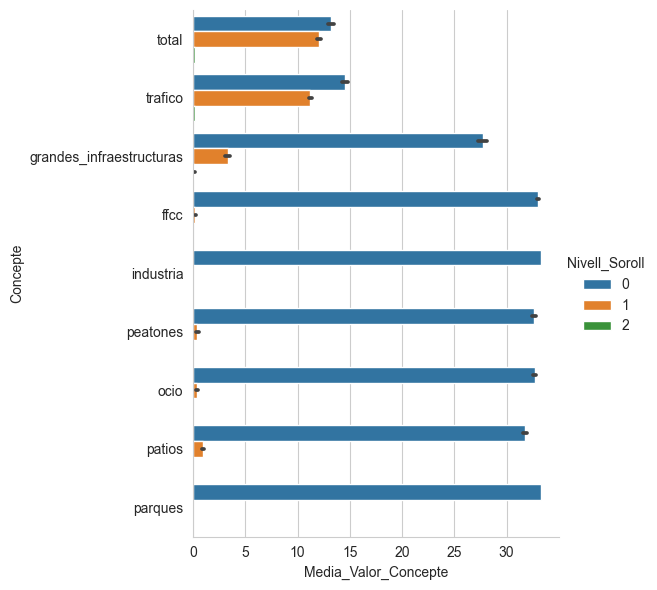

In [92]:
sns.catplot(
    data = df_lloguer_clen_copy, 
    x = 'Media_Valor_Concepte', 
    y = 'Concepte',
    hue = "Nivell_Soroll",
    kind = 'bar',
    height=6)

##### Podríamos decir que los agentes con nivel de ruido más altos son los de Tráfico, Grandes_infraestructuras y patios, respectivamente. Ya que como se puede observar todos tienen un nivel 0 de ruído muy alyto, es decir que no superan los 50dB, pero estos que comentamos podemos ver como el nivel 1 de ruido que va de los 50-75dB, son un poco más notables

In [93]:
df_lloguer_clen_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Trimestre                         7884 non-null   float64
 1   Codi_Districte                    7884 non-null   float64
 2   Codi_Barri                        7884 non-null   float64
 3   Preu_lloguer_mitja_mensual        7884 non-null   float64
 4   Preu_lloguer_mitja_superficie_m2  7884 non-null   float64
 5   m2_superficie_media               7884 non-null   float64
 6   Concepte                          7884 non-null   object 
 7   Nivell_Soroll                     7884 non-null   int64  
 8   Media_Valor_Concepte              7884 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 554.5+ KB


In [94]:
df_lloguer_clen_copy.head()

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media,Concepte,Nivell_Soroll,Media_Valor_Concepte
0,1.0,1.0,1.0,734.99,13.5,54.443704,total,0,15.771667
1,1.0,1.0,1.0,734.99,13.5,54.443704,total,1,10.532000
2,1.0,1.0,1.0,734.99,13.5,54.443704,total,2,0.012500
3,1.0,1.0,1.0,734.99,13.5,54.443704,trafico,0,18.010833
4,1.0,1.0,1.0,734.99,13.5,54.443704,trafico,1,9.188500


In [95]:
for column in df_lloguer_clen_copy.describe(exclude = np.number).columns:
 df_lloguer_clen_copy =  OHE(df_lloguer_clen_copy,column)

In [96]:
df_lloguer_clen_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Trimestre                          7884 non-null   float64
 1   Codi_Districte                     7884 non-null   float64
 2   Codi_Barri                         7884 non-null   float64
 3   Preu_lloguer_mitja_mensual         7884 non-null   float64
 4   Preu_lloguer_mitja_superficie_m2   7884 non-null   float64
 5   m2_superficie_media                7884 non-null   float64
 6   Nivell_Soroll                      7884 non-null   int64  
 7   Media_Valor_Concepte               7884 non-null   float64
 8   Concepte_ffcc                      7884 non-null   bool   
 9   Concepte_grandes_infraestructuras  7884 non-null   bool   
 10  Concepte_industria                 7884 non-null   bool   
 11  Concepte_ocio                      7884 non-null   bool 

In [97]:
df_lloguer_clen_copy.head(3)

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media,Nivell_Soroll,Media_Valor_Concepte,Concepte_ffcc,Concepte_grandes_infraestructuras,Concepte_industria,Concepte_ocio,Concepte_parques,Concepte_patios,Concepte_peatones,Concepte_total,Concepte_trafico
0,1.0,1.0,1.0,734.99,13.5,54.443704,0,15.771667,False,False,False,False,False,False,False,True,False
1,1.0,1.0,1.0,734.99,13.5,54.443704,1,10.532000,False,False,False,False,False,False,False,True,False
2,1.0,1.0,1.0,734.99,13.5,54.443704,2,0.012500,False,False,False,False,False,False,False,True,False


In [98]:
columns_to_convert = df_lloguer_clen_copy.columns[8:]
df_lloguer_clen_copy[columns_to_convert] = df_lloguer_clen_copy[columns_to_convert].astype(int)

In [99]:
df_lloguer_clen_copy.head(3)

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media,Nivell_Soroll,Media_Valor_Concepte,Concepte_ffcc,Concepte_grandes_infraestructuras,Concepte_industria,Concepte_ocio,Concepte_parques,Concepte_patios,Concepte_peatones,Concepte_total,Concepte_trafico
0,1.0,1.0,1.0,734.99,13.5,54.443704,0,15.771667,0,0,0,0,0,0,0,1,0
1,1.0,1.0,1.0,734.99,13.5,54.443704,1,10.532000,0,0,0,0,0,0,0,1,0
2,1.0,1.0,1.0,734.99,13.5,54.443704,2,0.012500,0,0,0,0,0,0,0,1,0


In [100]:
df_final = df_lloguer_clen_copy.copy()

In [101]:
df_final

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media,Nivell_Soroll,Media_Valor_Concepte,Concepte_ffcc,Concepte_grandes_infraestructuras,Concepte_industria,Concepte_ocio,Concepte_parques,Concepte_patios,Concepte_peatones,Concepte_total,Concepte_trafico
0,1.0,1.0,1.0,734.99,13.50,54.443704,0,15.771667,0,0,0,0,0,0,0,1,0
1,1.0,1.0,1.0,734.99,13.50,54.443704,1,10.532000,0,0,0,0,0,0,0,1,0
2,1.0,1.0,1.0,734.99,13.50,54.443704,2,0.012500,0,0,0,0,0,0,0,1,0
3,1.0,1.0,1.0,734.99,13.50,54.443704,0,18.010833,0,0,0,0,0,0,0,0,1
4,1.0,1.0,1.0,734.99,13.50,54.443704,1,9.188500,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7879,4.0,10.0,73.0,692.67,10.38,66.731214,1,0.323000,0,0,0,0,0,1,0,0,0
7880,4.0,10.0,73.0,692.67,10.38,66.731214,2,0.000000,0,0,0,0,0,1,0,0,0
7881,4.0,10.0,73.0,692.67,10.38,66.731214,0,33.333333,0,0,0,0,1,0,0,0,0
7882,4.0,10.0,73.0,692.67,10.38,66.731214,1,0.000000,0,0,0,0,1,0,0,0,0


In [102]:
df_final.sort_values(by=['Trimestre','Codi_Districte','Codi_Barri','Nivell_Soroll'],inplace=True)
df_final.reset_index(drop=True,inplace=True)

In [103]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7884 entries, 0 to 7883
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Trimestre                          7884 non-null   float64
 1   Codi_Districte                     7884 non-null   float64
 2   Codi_Barri                         7884 non-null   float64
 3   Preu_lloguer_mitja_mensual         7884 non-null   float64
 4   Preu_lloguer_mitja_superficie_m2   7884 non-null   float64
 5   m2_superficie_media                7884 non-null   float64
 6   Nivell_Soroll                      7884 non-null   int64  
 7   Media_Valor_Concepte               7884 non-null   float64
 8   Concepte_ffcc                      7884 non-null   int32  
 9   Concepte_grandes_infraestructuras  7884 non-null   int32  
 10  Concepte_industria                 7884 non-null   int32  
 11  Concepte_ocio                      7884 non-null   int32

In [104]:
df_final.columns

Index(['Trimestre', 'Codi_Districte', 'Codi_Barri',
       'Preu_lloguer_mitja_mensual', 'Preu_lloguer_mitja_superficie_m2',
       'm2_superficie_media', 'Nivell_Soroll', 'Media_Valor_Concepte',
       'Concepte_ffcc', 'Concepte_grandes_infraestructuras',
       'Concepte_industria', 'Concepte_ocio', 'Concepte_parques',
       'Concepte_patios', 'Concepte_peatones', 'Concepte_total',
       'Concepte_trafico'],
      dtype='object')

In [105]:
#Convertimos  a integers, ya que son números enteros y será más visual para la construcción del id
df_final[['Trimestre', 'Codi_Districte', 'Codi_Barri','Nivell_Soroll']] = df_final[['Trimestre', 'Codi_Districte', 'Codi_Barri','Nivell_Soroll']].astype(int)

In [106]:
df_final['id'] = df_final['Trimestre'].apply(str) + "_" + df_final['Codi_Districte'].apply(str)  + "_" + df_final['Codi_Barri'].apply(str) + "_" + df_final['Nivell_Soroll'].apply(str)
df_final.set_index('id',inplace=True)

# id = primer número(trimestre), segundo(Distrito), Tercero(Barrio), Cuarto (Nivel Ruido)

In [107]:
df_final[(df_final['Codi_Districte']==1) & (df_final['Codi_Barri']==2)]

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media,Nivell_Soroll,Media_Valor_Concepte,Concepte_ffcc,Concepte_grandes_infraestructuras,Concepte_industria,Concepte_ocio,Concepte_parques,Concepte_patios,Concepte_peatones,Concepte_total,Concepte_trafico
id,,,,,,,,,,,,,,,,,
1_1_2_0,1,1,2,905.26,14.14,64.021216,0,14.712500,0,0,0,0,0,0,0,1,0
1_1_2_0,1,1,2,905.26,14.14,64.021216,0,21.195833,0,0,0,0,0,0,0,0,1
1_1_2_0,1,1,2,905.26,14.14,64.021216,0,31.664167,0,1,0,0,0,0,0,0,0
1_1_2_0,1,1,2,905.26,14.14,64.021216,0,33.333333,1,0,0,0,0,0,0,0,0
1_1_2_0,1,1,2,905.26,14.14,64.021216,0,33.333333,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4_1_2_2,4,1,2,993.16,14.41,68.921582,2,0.000000,0,0,1,0,0,0,0,0,0
4_1_2_2,4,1,2,993.16,14.41,68.921582,2,0.000000,0,0,0,0,0,0,1,0,0
4_1_2_2,4,1,2,993.16,14.41,68.921582,2,0.000000,0,0,0,1,0,0,0,0,0


In [117]:
df_final.head().T

id,1_1_1_0,1_1_1_0,1_1_1_0,1_1_1_0,1_1_1_0
Trimestre,1.000000,1.000000,1.000000,1.000000,1.000000
Codi_Districte,1.000000,1.000000,1.000000,1.000000,1.000000
Codi_Barri,1.000000,1.000000,1.000000,1.000000,1.000000
Preu_lloguer_mitja_mensual,734.990000,734.990000,734.990000,734.990000,734.990000
Preu_lloguer_mitja_superficie_m2,13.500000,13.500000,13.500000,13.500000,13.500000
m2_superficie_media,54.443704,54.443704,54.443704,54.443704,54.443704
Nivell_Soroll,0.000000,0.000000,0.000000,0.000000,0.000000
Media_Valor_Concepte,15.771667,18.010833,32.163333,33.333333,33.333333
Concepte_ffcc,0.000000,0.000000,0.000000,1.000000,0.000000
Concepte_grandes_infraestructuras,0.000000,0.000000,1.000000,0.000000,0.000000


In [108]:
corr = df_final.corr(numeric_only = True)

corr.style.background_gradient(cmap='coolwarm')

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media,Nivell_Soroll,Media_Valor_Concepte,Concepte_ffcc,Concepte_grandes_infraestructuras,Concepte_industria,Concepte_ocio,Concepte_parques,Concepte_patios,Concepte_peatones,Concepte_total,Concepte_trafico
Trimestre,1.000000,0.000000,0.000000,0.056663,0.096088,-0.017620,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000
Codi_Districte,0.000000,1.000000,0.980874,-0.331536,-0.425442,-0.120643,-0.000000,-0.001426,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
Codi_Barri,0.000000,0.980874,1.000000,-0.345723,-0.442944,-0.118248,-0.000000,-0.002205,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000
Preu_lloguer_mitja_mensual,0.056663,-0.331536,-0.345723,1.000000,0.755320,0.754932,0.000000,-0.001589,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
Preu_lloguer_mitja_superficie_m2,0.096088,-0.425442,-0.442944,0.755320,1.000000,0.161875,0.000000,0.000218,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000
m2_superficie_media,-0.017620,-0.120643,-0.118248,0.754932,0.161875,1.000000,-0.000000,-0.002554,-0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
Nivell_Soroll,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,1.000000,-0.837948,0.000000,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000
Media_Valor_Concepte,0.000000,-0.001426,-0.002205,-0.001589,0.000218,-0.002554,-0.837948,1.000000,0.016986,-0.000659,0.018096,0.015835,0.018113,0.012729,0.015813,-0.050763,-0.046150
Concepte_ffcc,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.016986,1.000000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000
Concepte_grandes_infraestructuras,-0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000000,-0.000659,-0.125000,1.000000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000,-0.125000


# **Escalado datos**

In [112]:
minMaxResultado = MinMaxScaler()

In [114]:
df_final_scaled = minMaxResultado.fit_transform(df_final)

In [115]:
df_final_scaled.head()

,Trimestre,Codi_Districte,Codi_Barri,Preu_lloguer_mitja_mensual,Preu_lloguer_mitja_superficie_m2,m2_superficie_media,Nivell_Soroll,Media_Valor_Concepte,Concepte_ffcc,Concepte_grandes_infraestructuras,Concepte_industria,Concepte_ocio,Concepte_parques,Concepte_patios,Concepte_peatones,Concepte_total,Concepte_trafico
id,,,,,,,,,,,,,,,,,
1_1_1_0,0.0,0.0,0.0,0.273733,0.560025,0.221343,0.0,0.473150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1_1_1_0,0.0,0.0,0.0,0.273733,0.560025,0.221343,0.0,0.540325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1_1_1_0,0.0,0.0,0.0,0.273733,0.560025,0.221343,0.0,0.964900,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_1_1_0,0.0,0.0,0.0,0.273733,0.560025,0.221343,0.0,1.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1_1_1_0,0.0,0.0,0.0,0.273733,0.560025,0.221343,0.0,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
report_df(df_final_scaled)

El tamaño del dataset es 7884 filas y 17 columnas

<class 'pandas.core.frame.DataFrame'>
Index: 7884 entries, 1_1_1_0 to 4_10_73_2
Data columns (total 17 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Trimestre                          7884 non-null   float64
 1   Codi_Districte                     7884 non-null   float64
 2   Codi_Barri                         7884 non-null   float64
 3   Preu_lloguer_mitja_mensual         7884 non-null   float64
 4   Preu_lloguer_mitja_superficie_m2   7884 non-null   float64
 5   m2_superficie_media                7884 non-null   float64
 6   Nivell_Soroll                      7884 non-null   float64
 7   Media_Valor_Concepte               7884 non-null   float64
 8   Concepte_ffcc                      7884 non-null   float64
 9   Concepte_grandes_infraestructuras  7884 non-null   float64
 10  Concepte_industria                 7884 non-null   float64
 11 

# **Conclusiones**

##### Como hemos ido observando a lo largo del proyecto, los precios son más altos en determinados Barrios y Distritos, el precio parece estar relacionado con los m2 de las viviendas. Por otro lado, a nivel de contaminación acústica, hemos podido observar que hay agentes contaminantes con mayor elevado nivel sonoro que otros, como el caso del tránsito o grandes infraestructuras, como era de esperar. Según la tabla de correlación final de los datos, el nivel de ruido no parece estar correlacionado con el precio de alquiler de la vivienda. Así que, probablemente este más afectado por la superficie como comentábamos anteriormente. 